# Outlier Analysis

In this example, we create a dataset with four clusters using make_blobs and add an outlier manually. 

We then apply both K-Means and DBSCAN clustering techniques to detect the clusters. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Generate Dataset

In [2]:
# Generating synthetic data with outliers
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
outliers = np.array([[10, 10]])  # Adding an outlier
X = np.concatenate([X, outliers])

### Clustering

In [3]:
# Scaling the data
X = StandardScaler().fit_transform(X)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, n_init ='auto',random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

### Plot

The scatter plots show the clustering results, with different colors representing different clusters. 

The red 'o' marks in the K-Means plot indicate the cluster centroids. K-Means, by its nature, does not explicitly label outliers. It assigns each data point to the nearest cluster center and doesn't identify points as outliers. However, one way to identify potential outliers in the context of K-Means is to look for data points that are significantly far away from the cluster centers. These can be considered as potential outliers.

The points labeled as outliers by DBSCAN are explicitly highlighted in red with the 'X' marker. Adjust the DBSCAN parameters as needed for your specific dataset.

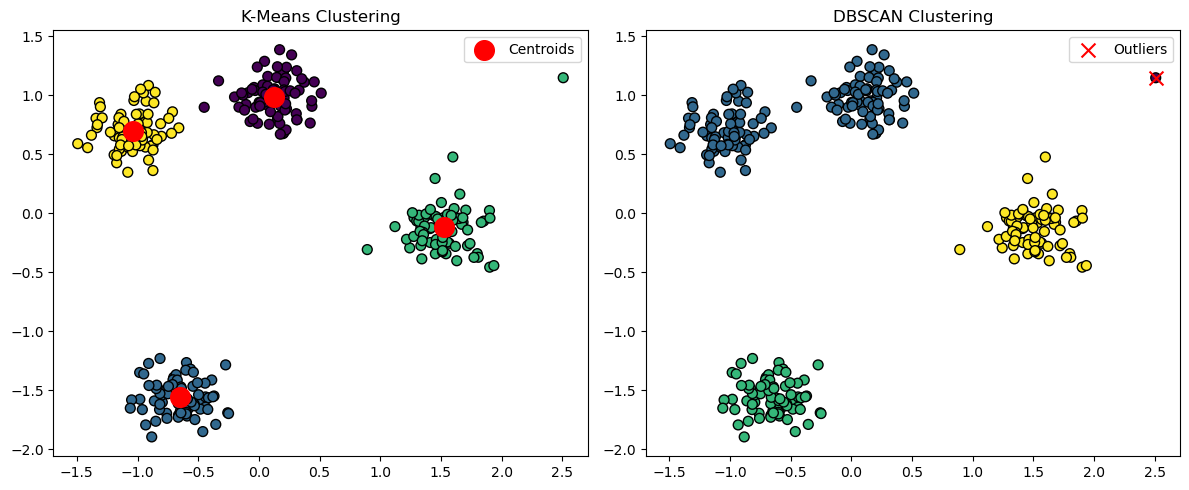

In [4]:
# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')

# Highlighting outliers (points with label -1)
outliers_mask = dbscan_labels == -1
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', marker='x', s=100, label='Outliers')

plt.tight_layout()
plt.legend()
plt.show()
